In [3]:
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
# allow multiple outputs in one cell in jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# %qtconsole

In [5]:
norm_data = pd.read_csv('/Users/cgu3/Documents/Crispr/report/all_sample/all_sample.normalized.txt', sep='\t', header=0)
# get number of rows
len(norm_data)

103650

### Generate a list of genes that are specific to the heterozygous group and wild-type group

In [6]:
# aggregate sgRNAs with the same gene symbol and remove sgRNA column
gene_norm_data = norm_data.groupby(norm_data['Gene']).sum()
# find genes has non-zero in sample_het_1 and zero value in sample_wt_1
het_specific_group_1 = gene_norm_data[(gene_norm_data['sample_het_1'] > 0) & (gene_norm_data['sample_wt_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_wt_1 and zero value in sample_het_1
wt_specific_group_1 = gene_norm_data[(gene_norm_data['sample_wt_1'] > 0) & (gene_norm_data['sample_het_1'] == 0)].loc[:, ['sample_het_1', 'sample_wt_1']]
# find genes has non-zero in sample_het_6 and zero value in sample_wt_6
het_specific_group_6 = gene_norm_data[(gene_norm_data['sample_het_6'] > 0) & (gene_norm_data['sample_wt_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']]
# find genes has non-zero in sample_wt_6 and zero value in sample_het_6
wt_specific_group_6 = gene_norm_data[(gene_norm_data['sample_wt_6'] > 0) & (gene_norm_data['sample_het_6'] == 0)].loc[:, ['sample_het_6', 'sample_wt_6']]

het_specific_group_1_gene_list = het_specific_group_1.index.tolist()
wt_specific_group_1_gene_list = wt_specific_group_1.index.tolist()
het_specific_group_6_gene_list = het_specific_group_6.index.tolist()
wt_specific_group_6_gene_list = wt_specific_group_6.index.tolist()


In [7]:
# Replace 0 with minimum non-zero value in the dataframe
# remove sgRNA and Gene column
norm_data_numeric = norm_data.drop(columns=['sgRNA', 'Gene'])
# find the minimum non-zero value in norm_data
non_zero_min = norm_data_numeric[norm_data_numeric > 0].min().min()
# replace zero value with the minimum non-zero value
norm_data = norm_data.replace(0, non_zero_min)

In [8]:
# remove sgRNAs start with negative_control
neg_controls = norm_data[norm_data.sgRNA.str.startswith('negative_control')]
norm_data = norm_data[~norm_data.sgRNA.str.startswith('negative_control')]
norm_data

,sgRNA,Gene,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6
4340,0610007P14Rik_1,0610007P14Rik,0.627188,389.058524,0.627188,729.949448,1780.814259,733.702853,822.263554,758.173612,274.774916,527.465362,0.627188,0.627188
4341,ACE3_1,ACE3,978.250049,1725.777947,0.627188,910.950487,166.177374,0.627188,0.627188,0.627188,0.627188,0.627188,103.478459,0.627188
4342,ACE3_2,ACE3,0.627188,249.854098,0.627188,288.676840,1337.408286,1626.248591,0.627188,134.084407,128.228294,310.458210,305.659449,0.627188
4343,ACE3_3,ACE3,115.557032,221.299344,0.627188,257.629217,492.939613,0.627188,193.942615,525.105427,291.261410,1154.026477,1414.470940,0.627188
4344,ACE3_4,ACE3,901.544088,0.627188,1764.894555,404.279694,575.229370,2477.192621,790.382576,794.678267,288.513661,417.080221,429.037612,779.470102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103645,Zzz3_1,Zzz3,374.564174,305.178934,1104.882335,517.900784,209.319576,0.627188,0.627188,116.534092,284.849996,419.588974,472.816960,0.627188
103646,Zzz3_2,Zzz3,3108.085696,1229.639096,1637.267883,500.064916,138.214835,0.627188,1.328374,128.468306,0.627188,325.510729,212.528836,0.627188
103647,Zzz3_3,Zzz3,0.627188,416.720942,0.627188,188.928092,391.475544,0.627188,2.656748,443.671965,1348.228919,528.719739,429.833600,0.627188
103648,Zzz3_4,Zzz3,0.627188,0.627188,0.627188,204.782198,458.585637,0.627188,189.957493,698.502540,528.483754,575.758862,394.014133,823.758176


In [9]:
# remove part before "_[0-9]+" in column sgRNA
norm_data['sgRNA_index'] = norm_data['sgRNA'].str.extract(r'_(\d+)', expand=False)

In [10]:
# # slice column Gene  sample_het_1 and sample_wt_1
norm_data_1 = norm_data[['sgRNA_index', 'Gene', 'sample_het_1', 'sample_wt_1']]
norm_data_6 = norm_data[['sgRNA_index', 'Gene', 'sample_het_6', 'sample_wt_6']]

norm_data_6

,sgRNA_index,Gene,sample_het_6,sample_wt_6
4340,1,0610007P14Rik,0.627188,733.702853
4341,1,ACE3,0.627188,0.627188
4342,2,ACE3,0.627188,1626.248591
4343,3,ACE3,0.627188,0.627188
4344,4,ACE3,779.470102,2477.192621
...,...,...,...,...
103645,1,Zzz3,0.627188,0.627188
103646,2,Zzz3,0.627188,0.627188
103647,3,Zzz3,0.627188,0.627188
103648,4,Zzz3,823.758176,0.627188


In [11]:
# pivot_wide the table and use the index as column name 
norm_data_1 = norm_data_1.pivot(index='Gene', columns='sgRNA_index', values=['sample_het_1', 'sample_wt_1'])
# remove row if all value in the row is 0
norm_data_1 = norm_data_1.loc[(norm_data_1 != 0).any(axis=1)]
# remove if the row has NaN value
norm_data_1 = norm_data_1.dropna()
# remove if row all has the same value
norm_data_1 = norm_data_1.loc[(norm_data_1['sample_het_1'] != norm_data_1['sample_wt_1']).any(axis=1)]


# do the same above for norm_data_6
norm_data_6 = norm_data_6.pivot(index='Gene', columns='sgRNA_index', values=['sample_het_6', 'sample_wt_6'])
norm_data_6 = norm_data_6.loc[(norm_data_6 != 0).any(axis=1)]
norm_data_6 = norm_data_6.dropna()
norm_data_6 = norm_data_6.loc[(norm_data_6['sample_het_6'] != norm_data_6['sample_wt_6']).any(axis=1)]

In [12]:
# ['_'.join(col).strip() for col in norm_data_1.columns.values]

In [13]:
# perform wilcoxon signed-rank test for each row in the dataframe between sample_het_1 and sample_wt_1 and extract the z score
# todo: use signed rank to calculate the p-value
from scipy.stats import wilcoxon, ranksums
norm_data_1['pvalue'] = norm_data_1.apply(lambda x: ranksums(x['sample_het_1'], x['sample_wt_1']).pvalue, axis=1)
# calculate the log2 fold change
norm_data_1['LFC'] = np.log2(norm_data_1['sample_het_1'].mean(axis=1) / norm_data_1['sample_wt_1'].mean(axis=1))

# do the same above for norm_data_6
norm_data_6['pvalue'] = norm_data_6.apply(lambda x: ranksums(x['sample_het_6'], x['sample_wt_6']).pvalue, axis=1)
norm_data_6['LFC'] = np.log2(norm_data_6['sample_het_6'].mean(axis=1) / norm_data_6['sample_wt_6'].mean(axis=1))

In [14]:
neg_controls_1 = neg_controls[['Gene', 'sample_het_1', 'sample_wt_1']]
# remove row if all value in the row is 0
neg_controls_1 = neg_controls_1.loc[(neg_controls_1 != 0).any(axis=1)]

# do the same above for norm_data_6
neg_controls_6 = neg_controls[['Gene', 'sample_het_6', 'sample_wt_6']]
neg_controls_6 = neg_controls_6.loc[(neg_controls_6 != 0).any(axis=1)]

In [15]:
# len(neg_controls_1)
# # get all permutation of 5 number from 0 to 4339
# from itertools import combinations
# combs = list(combinations(range(len(neg_controls_1)), 5))

In [16]:
# random draw 5 rows from neg_controls_1
len_genes = len(norm_data_1)
ntc_LFC = np.zeros(len_genes)
ntc_pvalue = np.zeros(len_genes)
i = 0
while True:
    if i == len_genes:
        break
    test = neg_controls_1.sample(n=5)
    # if  np.all((test['sample_het_1'] - test['sample_wt_1']) == 0):
        # continue
    # calculate the wilcoxon signed-rank statistic
    ntc_pvalue[i] = ranksums(test['sample_het_1'], test['sample_wt_1']).pvalue
    ntc_LFC[i] = np.log2(test['sample_het_1'].mean() / test['sample_wt_1'].mean())
    i+=1

# combine p-value and LFC to a dataframe
ntc_data_1 = pd.DataFrame({'pvalue': ntc_pvalue, 'LFC': ntc_LFC}, index=['NTC_%d' % i for i in range(0, len_genes)])

In [17]:
# do the same above for norm_data_6
len_genes = len(norm_data_6)
ntc_LFC = np.zeros(len_genes)
ntc_pvalue = np.zeros(len_genes)
i = 0
while True:
    if i == len_genes:
        break
    test = neg_controls_6.sample(n=5)
    # if  np.all((test['sample_het_1'] - test['sample_wt_1']) == 0):
        # continue
    ntc_pvalue[i] = ranksums(test['sample_het_6'], test['sample_wt_6']).pvalue
    ntc_LFC[i] = np.log2(test['sample_het_6'].mean() / test['sample_wt_6'].mean())
    i+=1
    
ntc_data_6 = pd.DataFrame({'pvalue': ntc_pvalue, 'LFC': ntc_LFC}, index=['NTC_%d' % i for i in range(0, len_genes)])

# For group 1

In [18]:
df = norm_data_1[[('pvalue', ''), ('LFC', '')]]
df.columns=['pvalue', 'LFC']
# combine the negative control data with the data from the sample
df = pd.concat([df, ntc_data_1])
# remove row if p-value is NaN
df = df.dropna()
df['gene_score'] = df['LFC'] * (-np.log10(df['pvalue']))
# add index as column to the dataframe "Gene"
df['Gene'] = df.index
# add jitter to the p-value
df['pvalue'] = df['pvalue'] + np.random.uniform(-0.03, 0.03, len(df))
# cap p-value between 0 and 1
df['pvalue'] = df['pvalue'].clip(0.01, 1)

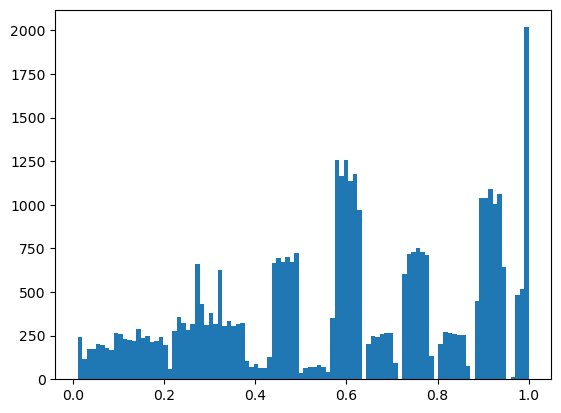

In [19]:
# hist plot of the p-value
plt.hist(df['pvalue'], bins=100);

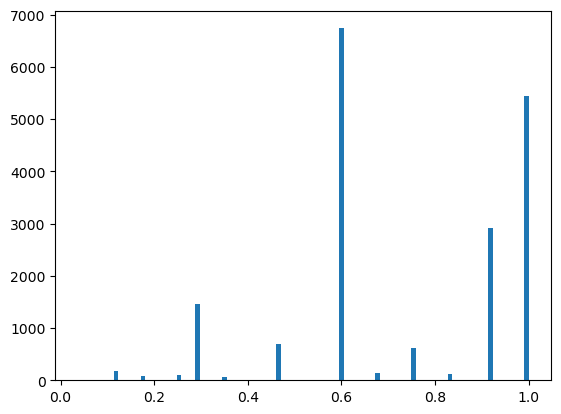

In [20]:
# plot hist of negative control p-value
plt.hist(ntc_pvalue, bins=100);

In [21]:
def product_threshold_fdr(df, fdr=0.05):
    maxi = abs(df['gene_score']).max()
    for pro in np.arange(0, maxi, 0.01):
        df_thres = df[abs(df['gene_score']) > pro]
        if (1.0 * len(df_thres[df_thres['Gene'].str.contains('NTC')]) / len(df_thres)) < fdr:
            break
    return pro, df_thres

In [22]:
fdr = 0.10
thres, df_hits = product_threshold_fdr(df, fdr)
# df.sort_values('product', ascending=False).to_csv(output_folder + '/' + output_name + '_all_genes.csv', index=False)
# df_hits.sort_values('product', ascending=False).to_csv(
#     output_folder + '/' + output_name + '_fdr%s_product%s_hits.csv' % (fdr, thres), index=False)
df_ntc = df[df['Gene'].str.contains('NTC')]

In [25]:
# remove gene symbol with NTC from df_hits
df_temp = df_hits[~df_hits['Gene'].str.contains('NTC')]
df_temp.to_csv('/Users/cgu3/Documents/Crispr/documents/results/group1_hits.csv', index=False)

In [26]:
# # remove NTC from the gene symbol
# df_temp = df[~df['Gene'].str.contains('NTC')]
# # sort by gene_score in descending order
# top_100_gene_list = list(df_temp.sort_values(by='gene_score', ascending=False).iloc[:100].index)
# # output as text with each gene in a new line
# with open('/Users/cgu3/Documents/Crispr/documents/supplementary files/top100_genes.txt', 'w') as f:
#     for item in top_100_gene_list:
#         f.write("%s\n" % item)

## Volcano plot

(-12.493778144535106, 12.493778144535106)

(0.0, 3.0)

Text(0.5, 0, 'Ndufs4+/+        Phenotype         Ndufs4+/-')

Text(0, 0.5, '-log10 P')

Text(0.5, 1.0, 'Group 1')

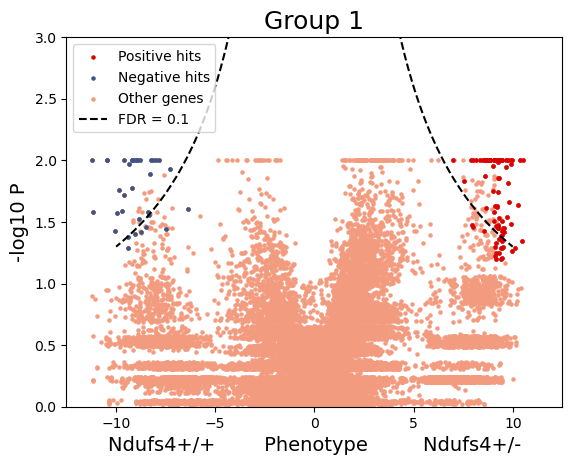

In [27]:
df_pos = df_hits[df_hits['LFC'] > 0]
df_neg = df_hits[df_hits['LFC'] < 0]
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label='Positive hits')
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label='Negative hits')
plt.scatter(df['LFC'], -np.log10(df['pvalue']), c='#F39B7FFF', s=5, label='Other genes')
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label=None)
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label=None)
# plt.scatter(df_ntc['LFC'], -np.log10(df_ntc['pvalue']), c='grey', s=5, label="Negative control")
genes = list(df['Gene'])
phenotype = list(df['LFC'])
p_value = list(-np.log10(df['pvalue']))
i = 0
# for x, y, s in zip(phenotype, p_value, genes):
#     if s in genes_to_label:
#         plt.annotate(s, (x + np.random.uniform(-3, 3), y + np.random.uniform(-0.1, 0.1)), fontsize=10, color='black')
#         if i == 0:
#             plt.scatter(x, y, c='darkgreen', s=5, label='Genes of interest')
#         else:
#             plt.scatter(x, y, c='darkgreen', s=5)
#         i = 1
# if str(label_all_sig_genes) == '1':
#     genes = list(df_hits['gene'])
#     phenotype = list(df_hits['LFC'])
#     p_value = list(-np.log10(df_hits['pvalue']))
#     for x, y, s in zip(phenotype, p_value, genes):
#         plt.annotate(s, (x, y), fontsize=16)

x = np.arange(0.01, 10, 0.01)
y = [thres / i for i in x]
plt.plot(x, y, '--', c='k', )
plt.plot(-x, y, '--', c='k', label='FDR = %s' % fdr)
lim = max(abs(df['LFC'].min() - 1), (df['LFC'].max() + 2))
plt.xlim(-lim, lim)
plt.ylim(0, -np.log10(df['pvalue'].min()) + 1)
plt.legend(loc=2, fontsize=10, fancybox=True)
plt.xlabel('Ndufs4+/+        Phenotype         Ndufs4+/-', fontsize=14)
plt.ylabel('-log10 P', fontsize=14)
plt.title('Group 1', fontsize=18)
plt.savefig('/Users/cgu3/Documents/Crispr/documents/Figures/group1_volcano_plot.png', bbox_inches='tight');
plt.show()

In [28]:
plot_data = df[['Gene', 'gene_score', 'LFC', 'pvalue']]
# sort the data in acsending order
plot_data = plot_data.sort_values(by='gene_score')
# add jitter to the statistic
# plot_data['statistic'] = plot_data['statistic'] + np.random.uniform(-0.05, 0.05, len(plot_data))
# add a column from 1 to the length of the data
plot_data = plot_data.reset_index()
# create a column to store the color of the data point, if the gene is in het_specific_group_1, set the color to red, if the gene is in wt_specific_group_1, set the color to blue, otherwise set the color to black
plot_data['color'] = 'black'
# get index of rows that the column Gene is in het_specific_group_1_gene_list
# get the column idx that is 'color' in the dataframe
# set the color of the data point to red

In [29]:
df_hits

,pvalue,LFC,gene_score,Gene
0610012H03Rik,0.010000,-9.178646,-18.766917,0610012H03Rik
1700019L03Rik,0.024994,-6.373027,-13.030470,1700019L03Rik
2310047M10Rik,0.033677,9.233454,18.878977,2310047M10Rik
2900011O08Rik,0.010000,-10.427319,-21.319987,2900011O08Rik
9530077C05Rik,0.034769,7.991984,16.340634,9530077C05Rik
...,...,...,...,...
NTC_10560,0.029521,9.297469,13.343448,NTC_10560
NTC_11051,0.010000,9.057679,18.519583,NTC_11051
NTC_11419,0.041986,-9.389723,-13.475848,NTC_11419
NTC_11909,0.063454,9.376827,13.457340,NTC_11909


## gene score plot

/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErro

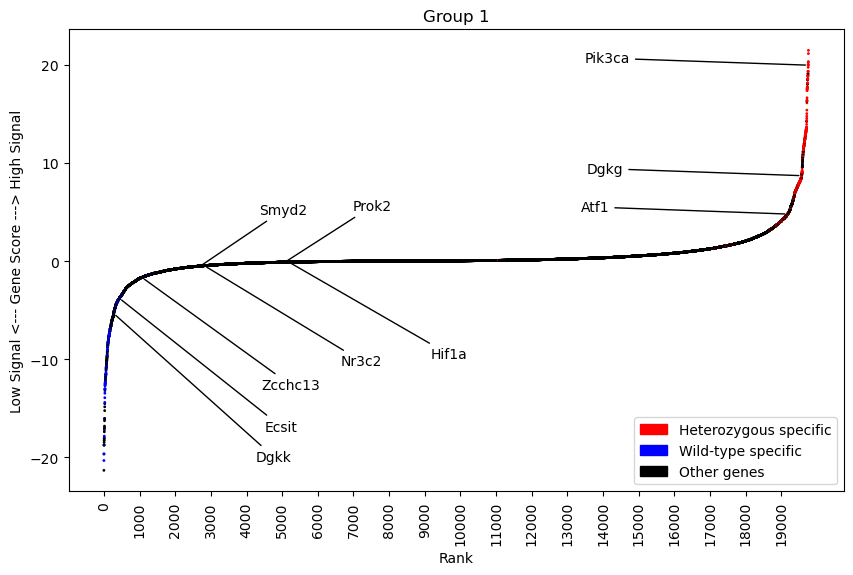

In [30]:
# only keep data without NTC in the gene symbol
scatter_plot_data = plot_data[~plot_data['Gene'].str.contains('NTC')].copy()
scatter_plot_data.reset_index(inplace=True, drop=True)
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(het_specific_group_1_gene_list))[0], 'color'] = 'red'
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(wt_specific_group_1_gene_list))[0], 'color'] = 'blue'
import matplotlib.patches as mpatches
import random

genes_to_label = [ 'Dgkk', 'Nr3c2', 'Hif1a', 'Zcchc13', 'Ecsit', 'Dgkg', 'Pik3ca', 'Atf1']
# 'Smyd2'


plt.figure(figsize=(10, 6));
# plot the point of  data and use position as x-axis
li = plt.scatter(y=scatter_plot_data['gene_score'], x=list(scatter_plot_data.index), marker='o', s=1, c=scatter_plot_data['color']);
plt.xlabel('Rank');
plt.ylabel('Low Signal <--- Gene Score ---> High Signal');
plt.title('Group 1');
# legend for three colors red, blue and black with corresponding labels HET, WT and Other
# plot a x-axis tick "100" every 100 points with gene symbol as label
plt.xticks(range(0, len(scatter_plot_data), 1000),  rotation=90);

scatter_plot_data.loc[:, 'x'] = li.get_offsets().data[:,0]
scatter_plot_data.loc[:, 'y'] = li.get_offsets().data[:,1]
# get location of the gene symbol: Prok2, Dgkk, Nr3c2, Hif1a, Smyd2, Zcchc13, Ecsit, Dgkg, Pik3ca, Atf1
annot_data = scatter_plot_data.loc[scatter_plot_data['Gene'].isin(genes_to_label)]
annot_data.reset_index(inplace=True, drop=True)
# annotate the gene symbol with arrow to the data point in the annot_data
for i in range(len(annot_data)):
    # y_offset = -5 if annot_data.iloc[i]['gene_score'] < 0 else 5
    if annot_data.iloc[i]['gene_score'] < 0:
        y_offset = annot_data.iloc[i]['gene_score']  -10
        x_offset = 5000 if annot_data.iloc[i]['gene_score'] < 0 else -5000
    else:
        y_offset = 0
        x_offset = 5000 if annot_data.iloc[i]['gene_score'] < 0 else -5000

    plt.annotate(
        annot_data.iloc[i]['Gene'],
        xy=(annot_data.iloc[i]['x'], annot_data.iloc[i]['y']),
        xytext=(annot_data.iloc[i]['x'] + x_offset, annot_data.iloc[i]['y']+ y_offset),
        arrowprops=dict(facecolor='black',  arrowstyle="-"),
        horizontalalignment='right', verticalalignment='bottom'
    );
    
# individually plot gene Prok2' with arrow to the data point
plt.annotate('Prok2', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Prok2', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Prok2', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Prok2', 'x'] + 3000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Prok2', 'y'] + 5), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom'); 
# individually plot gene 'Smyd2' with arrow to the data point
plt.annotate('Smyd2', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Smyd2', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Smyd2', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Smyd2', 'x'] + 3000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Smyd2', 'y'] + 5), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');

red_patch = mpatches.Patch(color='red', label='Heterozygous specific')
blue_patch = mpatches.Patch(color='blue', label='Wild-type specific')
black_patch = mpatches.Patch(color='black', label='Other genes')
# plot legend at bottom right location
plt.legend(handles=[red_patch, blue_patch, black_patch], loc='lower right', fontsize=10);
plt.savefig('/Users/cgu3/Documents/Crispr/documents/Figures/group1_gene_score_plot.png', bbox_inches='tight');
plt.show();

In [31]:
# import gseapy as gp
# rnk = df_hits.loc[:, ['Gene', 'gene_score']]
# # remove NTC from the gene symbol
# rnk = rnk[~rnk['Gene'].str.contains('NTC')]
# # remove Rik from the gene symbol
# rnk = rnk[~rnk['Gene'].str.contains('Rik')]
# # use Gene as index
# rnk = rnk.set_index('Gene')
# # remove Gene column
# rnk = rnk.iloc[:, [0]]
# pos= list(rnk[rnk['gene_score'] > 0].index)
# neg = rnk[rnk['gene_score'] < 0].index.str
# 
# enr = gp.enrichr(gene_list=pos, # or "./tests/data/gene_list.txt",
#                  gene_sets='../../library/m5.go.bp.v2023.2.Mm.symbols.gmt',
#                  organism='Mus musculus', # don't forget to set organism to the one you desired! e.g. Yeast
#                  outdir=None, # don't write to disk
#                  )
# 
# 
# # pre_res = gp.prerank(rnk=rnk, # or rnk = rnk,
# #                      gene_sets='../../library/m5.go.bp.v2023.2.Mm.symbols.gmt',
# #                      threads=4,
# #                      min_size=5,
# #                      max_size=1000,
# #                      permutation_num=1000, # reduce number to speed up testing
# #                      outdir=None, # don't write to disk
# #                      seed=6,
# #                      verbose=True # see what's going on behind the scenes
# #                      )

In [32]:
# pre_res.res2d

In [33]:
# enr.res2d

In [34]:
# # enr.res2d
# 
# # filter the result with p-value < 0.05
# pre_res_cutoff =  pre_res.res2d[pre_res.res2d['NOM p-val'] < 0.20].copy()
# # remove GOBP from Term
# pre_res_cutoff['Term'] = pre_res_cutoff['Term'].str.replace('GOBP_', '')
# # keep only NES with positive values
# pos_res = pre_res_cutoff[pre_res_cutoff['NES'] > 0]
# neg_res = pre_res_cutoff[pre_res_cutoff['NES'] < 0]
# # keep the top 5 positive NES
# pos_genes = pos_res.sort_values(by='NES', ascending=False)[:5]
# neg_genes = neg_res.sort_values(by='NES', ascending=True)[:5]

In [35]:
# # barplot NES
# fig, ax = plt.subplots(2)
# 
# # plt.subplots_adjust(top=0.9)
# ax[0].barh(pos_genes['Term'], pos_genes['NES'], color='red')
# ax[0].xaxis.tick_top()
# ax[1].barh(neg_genes['Term'], neg_genes['NES'])
# ax[1].yaxis.tick_right()
# 
# ax[0].spines['right'].set_visible(False)
# ax[0].spines['bottom'].set_visible(False)
# 
# 
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['left'].set_visible(False)

# For sample 6

In [36]:
df = norm_data_6[[('pvalue', ''), ('LFC', '')]]
df.columns=['pvalue', 'LFC']
# combine the negative control data with the data from the sample
df = pd.concat([df, ntc_data_6])
# remove row if p-value is NaN
df = df.dropna()
df['gene_score'] = df['LFC'] * (-np.log10(df['pvalue']))
# add index as column to the dataframe "Gene"
df['Gene'] = df.index
# add jitter to the p-value
df['pvalue'] = df['pvalue'] + np.random.uniform(-0.03, 0.03, len(df))
# cap p-value between 0 and 1
df['pvalue'] = df['pvalue'].clip(0.01, 1)

In [37]:
fdr = 0.10
thres, df_hits = product_threshold_fdr(df, fdr)
# df.sort_values('product', ascending=False).to_csv(output_folder + '/' + output_name + '_all_genes.csv', index=False)
# df_hits.sort_values('product', ascending=False).to_csv(
#     output_folder + '/' + output_name + '_fdr%s_product%s_hits.csv' % (fdr, thres), index=False)
df_ntc = df[df['Gene'].str.contains('NTC')]

In [38]:
# remove gene symbol with NTC from df_hits
df_temp = df_hits[~df_hits['Gene'].str.contains('NTC')]
df_temp.to_csv('/Users/cgu3/Documents/Crispr/documents/results/group6_hits.csv', index=False)

In [ ]:
df_pos = df_hits[df_hits['LFC'] > 0]
df_neg = df_hits[df_hits['LFC'] < 0]
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label='Positive hits')
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label='Negative hits')
plt.scatter(df['LFC'], -np.log10(df['pvalue']), c='#F39B7FFF', s=5, label='Other genes')
plt.scatter(df_pos['LFC'], -np.log10(df_pos['pvalue']), c="#DC0000FF", s=5, label=None)
plt.scatter(df_neg['LFC'], -np.log10(df_neg['pvalue']), c="#3C5488FF", s=5, label=None)
# plt.scatter(df_ntc['LFC'], -np.log10(df_ntc['pvalue']), c='grey', s=5, label="Negative control")
genes = list(df['Gene'])
phenotype = list(df['LFC'])
p_value = list(-np.log10(df['pvalue']))
i = 0
# for x, y, s in zip(phenotype, p_value, genes):
#     if s in genes_to_label:
#         plt.annotate(s, (x + np.random.uniform(-3, 3), y + np.random.uniform(-0.1, 0.1)), fontsize=10, color='black')
#         if i == 0:
#             plt.scatter(x, y, c='darkgreen', s=5, label='Genes of interest')
#         else:
#             plt.scatter(x, y, c='darkgreen', s=5)
#         i = 1
# if str(label_all_sig_genes) == '1':
#     genes = list(df_hits['gene'])
#     phenotype = list(df_hits['LFC'])
#     p_value = list(-np.log10(df_hits['pvalue']))
#     for x, y, s in zip(phenotype, p_value, genes):
#         plt.annotate(s, (x, y), fontsize=16)

x = np.arange(0.01, 10, 0.01)
y = [thres / i for i in x]
plt.plot(x, y, '--', c='k', )
plt.plot(-x, y, '--', c='k', label='FDR = %s' % fdr)
lim = max(abs(df['LFC'].min() - 1), (df['LFC'].max() + 2))
plt.xlim(-lim, lim)
plt.ylim(0, -np.log10(df['pvalue'].min()) + 1)
plt.legend(loc=2, fontsize=10, fancybox=True)
plt.xlabel('Ndufs4+/+        Phenotype         Ndufs4+/-', fontsize=14)
plt.ylabel('-log10 P', fontsize=14)
plt.title('Group 6', fontsize=18)
# plt.savefig(output_folder + "/" + output_name + '_volcano_plot.pdf')
plt.savefig('/Users/cgu3/Documents/Crispr/documents/Figures/group6_volcano_plot.png', bbox_inches='tight');
plt.show()

In [ ]:
plot_data = df[['Gene', 'gene_score', 'LFC', 'pvalue']]
# sort the data in acsending order
plot_data = plot_data.sort_values(by='gene_score')
# add jitter to the statistic
# plot_data['statistic'] = plot_data['statistic'] + np.random.uniform(-0.05, 0.05, len(plot_data))
# add a column from 1 to the length of the data
plot_data = plot_data.reset_index()
# create a column to store the color of the data point, if the gene is in het_specific_group_1, set the color to red, if the gene is in wt_specific_group_1, set the color to blue, otherwise set the color to black
plot_data['color'] = 'black'
# get index of rows that the column Gene is in het_specific_group_1_gene_list
# get the column idx that is 'color' in the dataframe
# set the color of the data point to red

In [ ]:
# only keep data without NTC in the gene symbol
scatter_plot_data = plot_data[~plot_data['Gene'].str.contains('NTC')].copy()
scatter_plot_data.reset_index(inplace=True, drop=True)
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(het_specific_group_6_gene_list))[0], 'color'] = 'red'
scatter_plot_data.loc[np.where(scatter_plot_data['Gene'].isin(wt_specific_group_6_gene_list))[0], 'color'] = 'blue'
import matplotlib.patches as mpatches
import random

genes_to_label = ['Pus1 ', 'Glo1', 'Chuk', 'Mapk3', 'Wnt1']


plt.figure(figsize=(10, 6));
# plot the point of  data and use position as x-axis
li = plt.scatter(y=scatter_plot_data['gene_score'], x=list(scatter_plot_data.index), marker='o', s=1, c=scatter_plot_data['color']);
plt.xlabel('Rank');
plt.ylabel('Low Signal <--- Gene Score ---> High Signal');
plt.title('Group 6');
# legend for three colors red, blue and black with corresponding labels HET, WT and Other
# plot a x-axis tick "100" every 100 points with gene symbol as label
plt.xticks(range(0, len(scatter_plot_data), 1000),  rotation=90);

scatter_plot_data.loc[:, 'x'] = li.get_offsets().data[:,0]
scatter_plot_data.loc[:, 'y'] = li.get_offsets().data[:,1]
annot_data = scatter_plot_data.loc[scatter_plot_data['Gene'].isin(genes_to_label)]
annot_data.reset_index(inplace=True, drop=True)
# annotate the gene symbol with arrow to the data point in the annot_data
for i in range(len(annot_data)):
    # y_offset = -5 if annot_data.iloc[i]['gene_score'] < 0 else 5
    if annot_data.iloc[i]['gene_score'] < 0:
        y_offset = annot_data.iloc[i]['gene_score']  -10
        x_offset = 5000 if annot_data.iloc[i]['gene_score'] < 0 else -5000
    else:
        y_offset = 10
        x_offset = 3000 if annot_data.iloc[i]['gene_score'] < 0 else  -3000

    plt.annotate(
        annot_data.iloc[i]['Gene'],
        xy=(annot_data.iloc[i]['x'], annot_data.iloc[i]['y']),
        xytext=(annot_data.iloc[i]['x'] + x_offset, annot_data.iloc[i]['y']+ y_offset),
        arrowprops=dict(facecolor='black',  arrowstyle="-"),
        horizontalalignment='right', verticalalignment='bottom'
    );

# # individually plot gene 'Hdac4' with arrow to the data point
plt.annotate('Hdac4', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Hdac4', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Hdac4', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Hdac4', 'x'] - 2000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Hdac4', 'y'] - 10), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');
# # # individually plot gene 'Pus1' with arrow to the data point
plt.annotate('Pus1', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Pus1', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Pus1', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Pus1', 'x'] + 1000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Pus1', 'y'] + 10), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');
# # # individually plot gene  'Map2k2' with arrow to the data point
plt.annotate('Map2k2', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Map2k2', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Map2k2', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Map2k2', 'x'] - 1000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Map2k2', 'y'] - 20), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');
# # # individually plot gene 'Eif2ak2' with arrow to the data point
plt.annotate('Eif2ak2', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Eif2ak2', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Eif2ak2', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Eif2ak2', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Eif2ak2', 'y'] - 20), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');
# individually plot gene ''Ppard' with arrow to the data point
plt.annotate('Ppard', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Ppard', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Ppard', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Ppard', 'x'] - 1000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Ppard', 'y'] + 8), arrowprops=dict(facecolor='black',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');
# # individually plot gene 'Gli3' with arrow to the data point
plt.annotate('Gli3', xy=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Gli3', 'x'], scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Gli3', 'y']), xytext=(scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Gli3', 'x'] - 1000, scatter_plot_data.loc[scatter_plot_data['Gene'] == 'Gli3', 'y'] - 10), 
             #color to green
             color='orange',
             # bold the text
                weight='bold',
             arrowprops=dict(facecolor='green',  arrowstyle="-"), horizontalalignment='right', verticalalignment='bottom');


red_patch = mpatches.Patch(color='red', label='Heterozygous specific')
blue_patch = mpatches.Patch(color='blue', label='Wild-type specific')
black_patch = mpatches.Patch(color='black', label='Other genes')
# plot legend at bottom right location
plt.legend(handles=[red_patch, blue_patch, black_patch], loc='lower right', fontsize=10);
# save the plot
plt.savefig('/Users/cgu3/Documents/Crispr/documents/Figures/group6_gene_score_plot.png', bbox_inches='tight');
plt.show();
